<a href="https://colab.research.google.com/github/Oloche1/3D-Geostatistical-Modeling-of-Borehole-Assay-Data/blob/main/Zinc_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# We'll need a few packages for this project
# pandas/numpy for data handling, matplotlib/seaborn for plotting
# pykrige for kriging, gstools for variograms and simulations, plotly for 3D plots
!pip install pandas numpy matplotlib seaborn pykrige gstools plotly openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 12.1 MB/s eta 0:00:00


In [5]:
# Now import everything we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Kriging
from pykrige.ok3d import OrdinaryKriging3D

# Variography and simulation
import gstools as gs

# 3D interactive plotting
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [8]:
# Upload your borehole CSV file from your computer
from google.colab import files
uploaded = files.upload()  # Colab will ask you to select the CSV

# Read the CSV into a DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Quick peek at the data
df.head()


Saving KANJE_boreholes_3D_kriging(in).csv to KANJE_boreholes_3D_kriging(in).csv


,Borehole_ID,X,Y,Z,Reading No,Ag,As,Cd,Cu,Fe,Mn,Pb,Sb,Zn
0,BH 1,513106.8476,894144.4589,114.0,699,0.0,0.0000,0.0,17.5802,32138.6953,1259.0328,19.3926,0.0,108.0176
1,BH 1,513106.8476,894144.4589,113.5,670,0.0,0.0000,0.0,176.0745,73756.6016,1046.2578,372.3064,0.0,451.4836
2,BH 1,513106.8476,894144.4589,113.0,671,0.0,41.0651,0.0,168.3078,76718.1172,4320.4395,920.7416,0.0,326.5186
3,BH 1,513106.8476,894144.4589,112.5,672,0.0,27.7369,0.0,168.5526,108315.8203,3633.1057,702.2665,0.0,579.1481
4,BH 1,513106.8476,894144.4589,112.0,673,0.0,0.0000,0.0,289.9716,114623.8047,3637.6328,854.1279,0.0,845.8016


In [9]:
# Let's also check some basic stats
df.describe()


,X,Y,Z,Reading No,Ag,As,Cd,Cu,Fe,Mn,Pb,Sb,Zn
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,513077.100534,894129.125463,90.965142,388.600946,10.940888,48.360605,21.557981,104.922081,74217.956259,3134.214963,294.268586,2.639192,14578.931857
std,27.624153,11.161990,16.276019,190.322334,34.269039,182.643969,124.761863,587.740617,73433.906021,5181.603598,1328.086542,21.361024,54111.673817
min,513028.352700,894116.670300,49.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,513044.906500,894119.133100,78.200000,221.250000,0.000000,0.000000,0.000000,0.000000,28174.309600,0.000000,13.269400,0.000000,326.971775
50%,513083.379300,894126.397400,92.000000,391.500000,0.000000,0.000000,0.000000,0.000000,47026.617200,1352.220150,27.029700,0.000000,952.874150
75%,513101.255700,894134.997900,106.000000,554.750000,0.000000,18.541450,0.000000,49.558500,93780.652375,3163.763500,123.668625,0.000000,3308.412775
max,513106.847600,894153.715500,114.000000,714.000000,284.544500,2006.073100,1343.663600,10989.542000,429198.000000,38995.406200,27203.511700,421.798400,475812.562500


In [10]:
# List all the elements we want to analyze
elements = ['Ag', 'As', 'Cd', 'Cu', 'Fe', 'Mn', 'Pb', 'Sb', 'Zn']


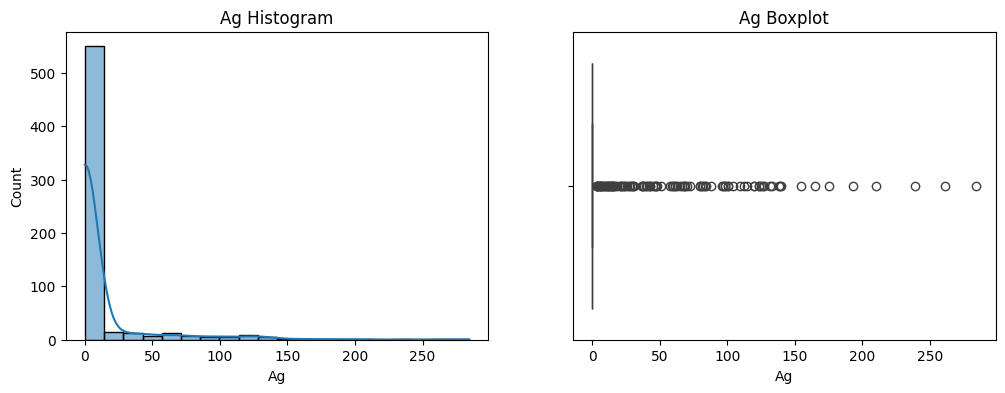

Summary stats for Ag:
count    634.000000
mean      10.940888
std       34.269039
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      284.544500
Name: Ag, dtype: float64 



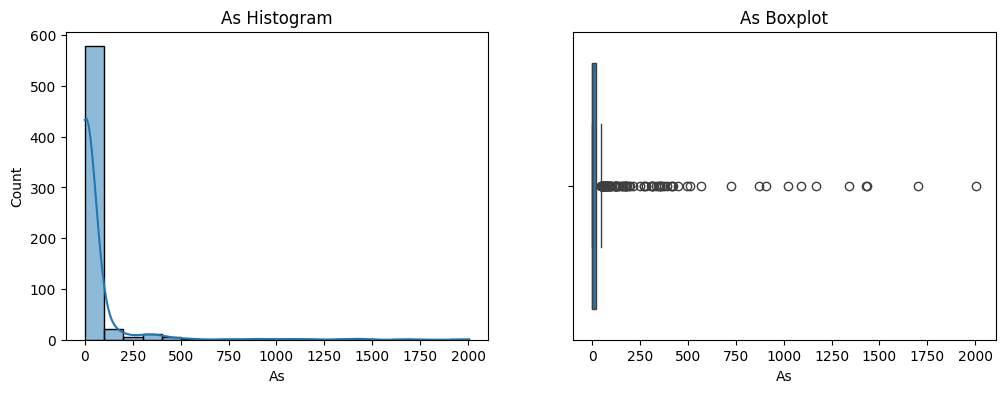

Summary stats for As:
count     634.000000
mean       48.360605
std       182.643969
min         0.000000
25%         0.000000
50%         0.000000
75%        18.541450
max      2006.073100
Name: As, dtype: float64 



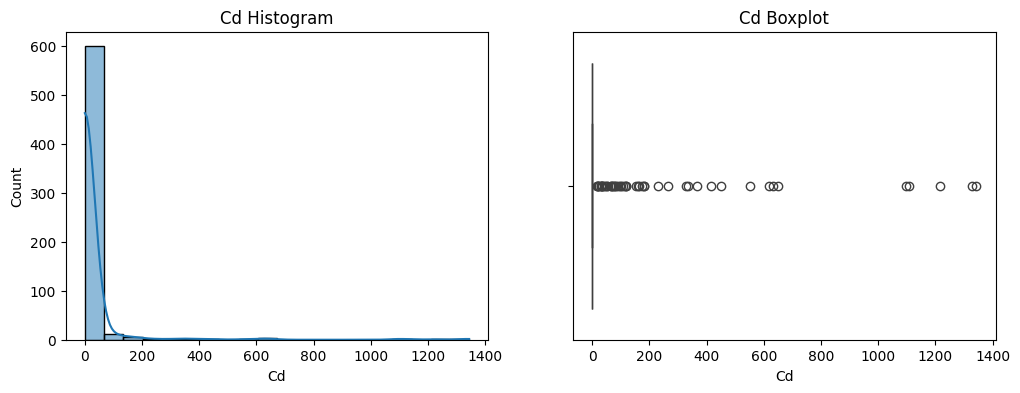

Summary stats for Cd:
count     634.000000
mean       21.557981
std       124.761863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1343.663600
Name: Cd, dtype: float64 



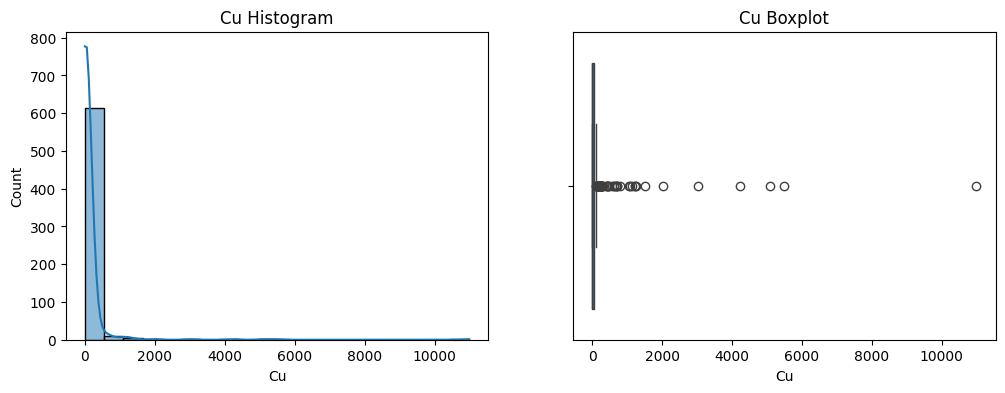

Summary stats for Cu:
count      634.000000
mean       104.922081
std        587.740617
min          0.000000
25%          0.000000
50%          0.000000
75%         49.558500
max      10989.542000
Name: Cu, dtype: float64 



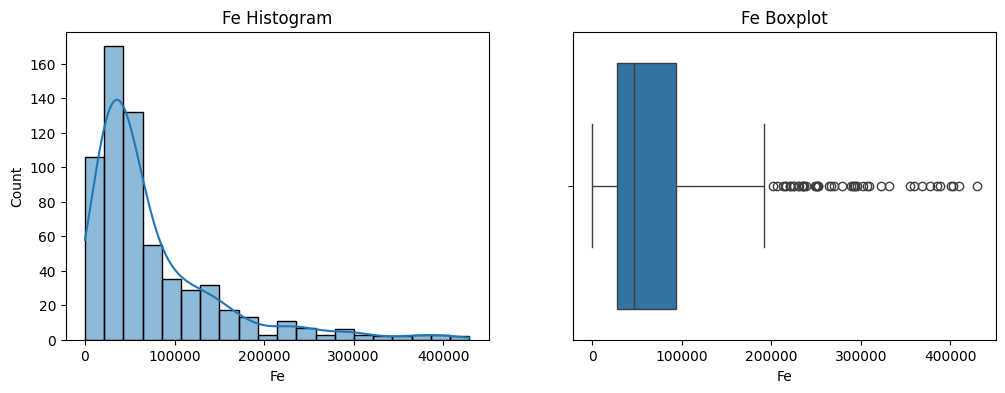

Summary stats for Fe:
count       634.000000
mean      74217.956259
std       73433.906021
min           0.000000
25%       28174.309600
50%       47026.617200
75%       93780.652375
max      429198.000000
Name: Fe, dtype: float64 



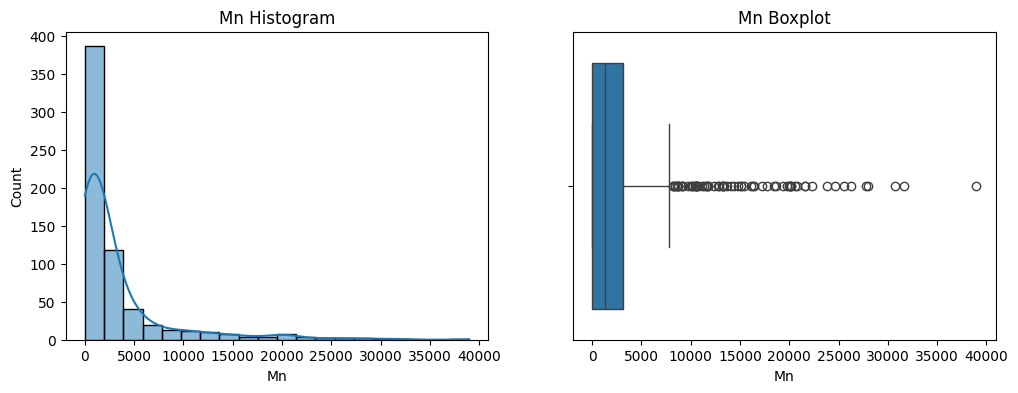

Summary stats for Mn:
count      634.000000
mean      3134.214963
std       5181.603598
min          0.000000
25%          0.000000
50%       1352.220150
75%       3163.763500
max      38995.406200
Name: Mn, dtype: float64 



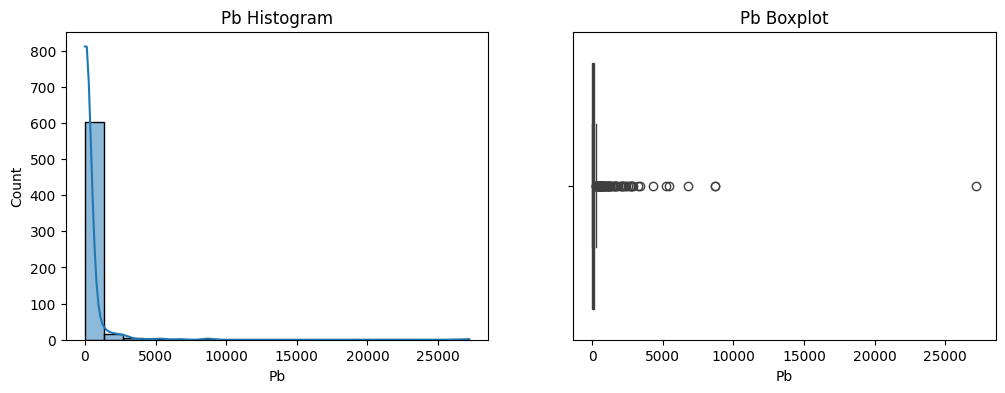

Summary stats for Pb:
count      634.000000
mean       294.268586
std       1328.086542
min          0.000000
25%         13.269400
50%         27.029700
75%        123.668625
max      27203.511700
Name: Pb, dtype: float64 



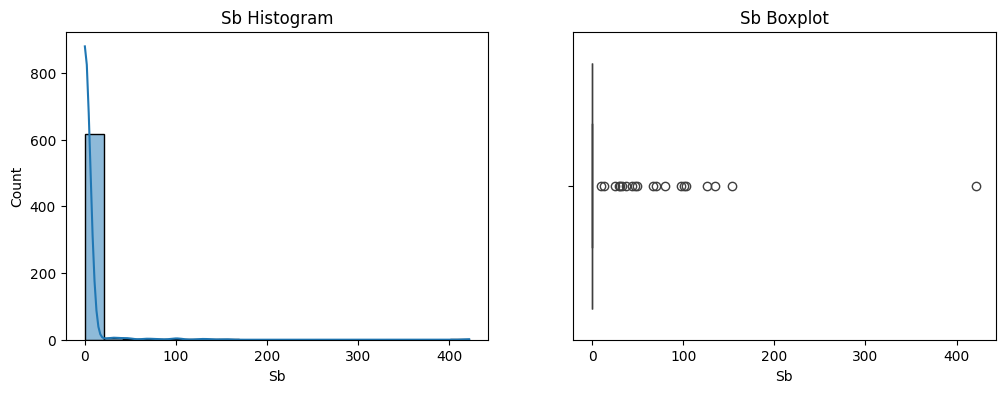

Summary stats for Sb:
count    634.000000
mean       2.639192
std       21.361024
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      421.798400
Name: Sb, dtype: float64 



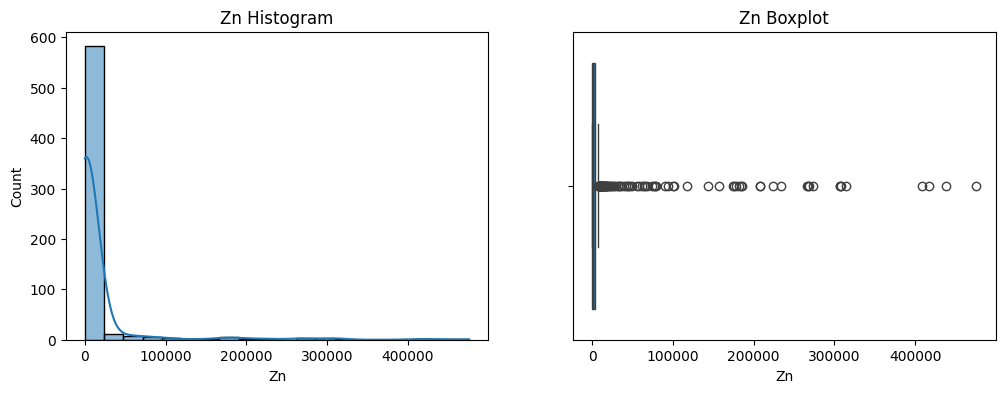

Summary stats for Zn:
count       634.000000
mean      14578.931857
std       54111.673817
min           0.000000
25%         326.971775
50%         952.874150
75%        3308.412775
max      475812.562500
Name: Zn, dtype: float64 



In [11]:
# Let's look at each element one by one
for el in elements:
    plt.figure(figsize=(12,4))

    # Histogram to see distribution
    plt.subplot(1,2,1)
    sns.histplot(df[el].dropna(), kde=True, bins=20)
    plt.title(f'{el} Histogram')

    # Boxplot to spot outliers
    plt.subplot(1,2,2)
    sns.boxplot(x=df[el].dropna())
    plt.title(f'{el} Boxplot')

    plt.show()

    # Print summary stats
    print(f"Summary stats for {el}:")
    print(df[el].describe(), "\n")


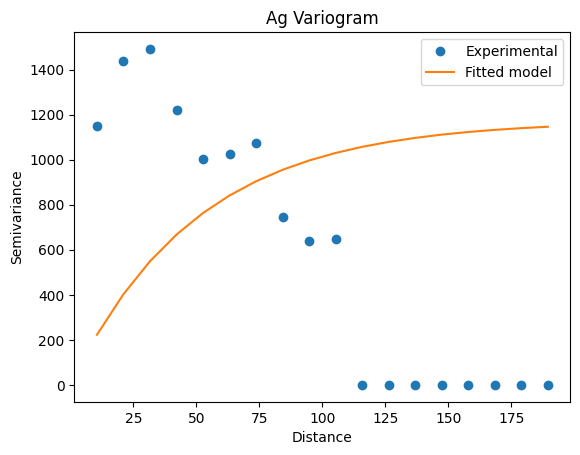

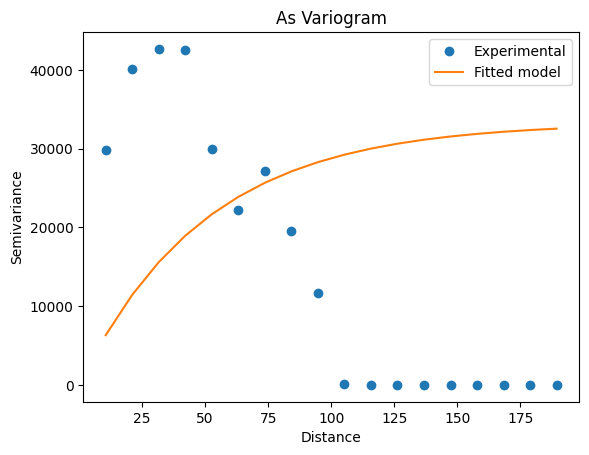

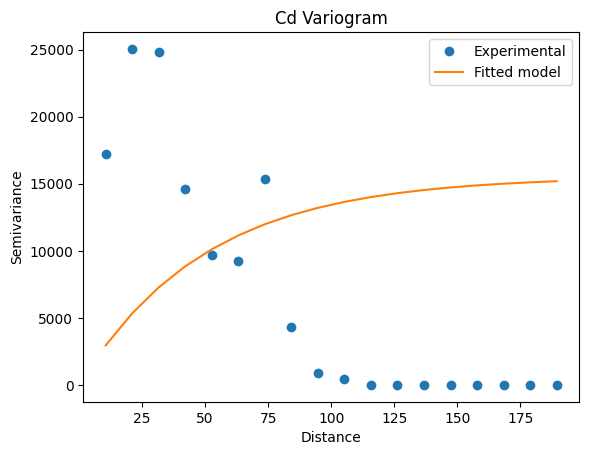

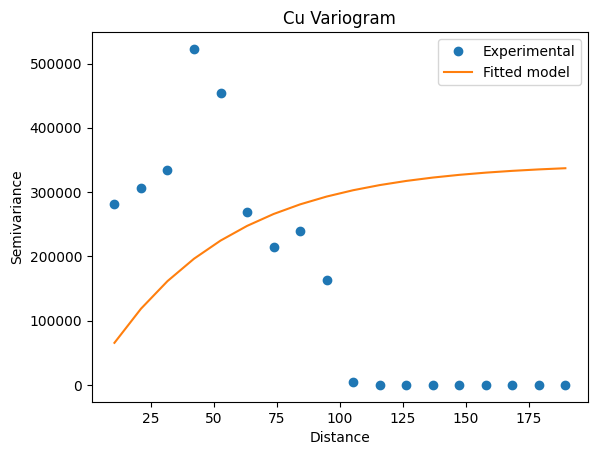

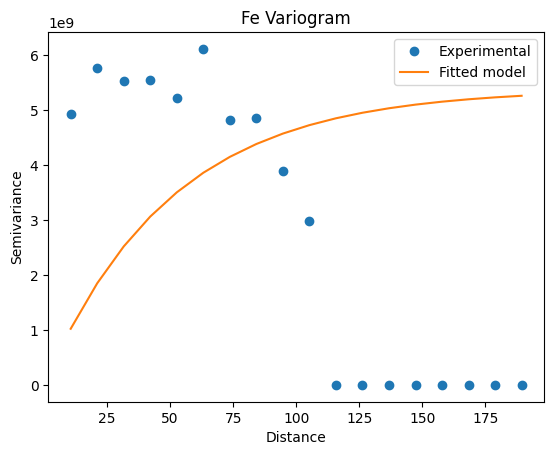

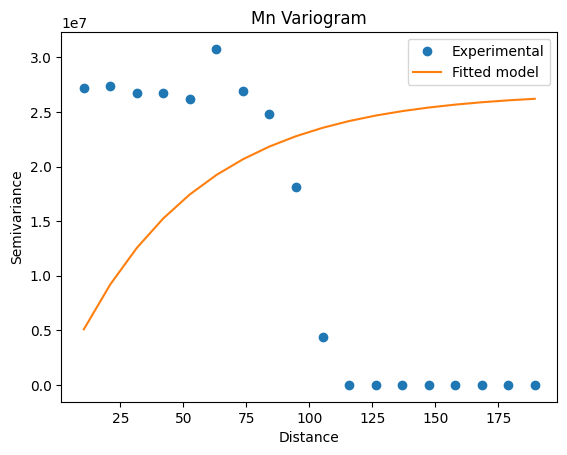

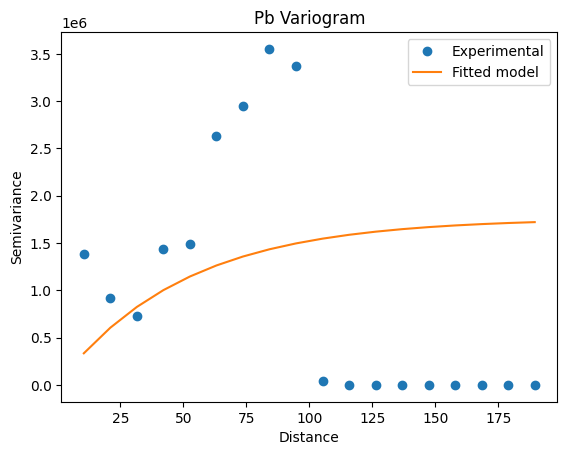

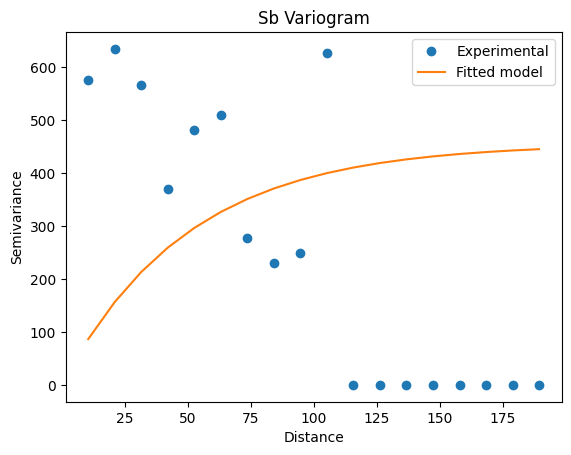

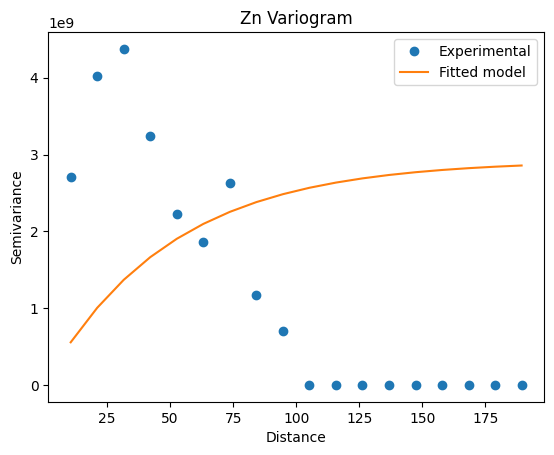

In [17]:
# Variography for each element with safe plotting
variograms = {}

for el in elements:
    x = df['X'].values
    y = df['Y'].values
    z = df['Z'].values
    val = df[el].values

    # Remove missing values
    mask = ~np.isnan(val)
    x, y, z, val = x[mask], y[mask], z[mask], val[mask]

    if len(val) < 5:
        print(f"Not enough data points for {el}, skipping variogram.")
        continue

    # Fit exponential variogram model
    model = gs.Exponential(dim=3, var=np.var(val), len_scale=50)

    try:
        # Experimental variogram
        bin_edges, gamma = gs.vario_estimate_unstructured(
            [x, y, z], val, latlon=False, bin_edges=np.linspace(0, 200, 20)
        )

        # Bin centers
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Match lengths
        if len(gamma) > len(bin_centers):
            gamma = gamma[:len(bin_centers)]
        elif len(gamma) < len(bin_centers):
            bin_centers = bin_centers[:len(gamma)]

        # Plot experimental vs model variogram
        plt.figure()
        plt.plot(bin_centers, gamma, 'o', label='Experimental')
        plt.plot(bin_centers, model.variogram(bin_centers), label='Fitted model')
        plt.title(f'{el} Variogram')
        plt.xlabel('Distance')
        plt.ylabel('Semivariance')
        plt.legend()
        plt.show()

        # Save model for later simulation
        variograms[el] = model

    except Exception as e:
        print(f"Error computing variogram for {el}: {e}")


In [18]:
# Define the 3D grid where we want predictions
grid_x = np.linspace(df['X'].min(), df['X'].max(), 30)
grid_y = np.linspace(df['Y'].min(), df['Y'].max(), 30)
grid_z = np.linspace(df['Z'].min(), df['Z'].max(), 30)

kx, ky, kz = np.meshgrid(grid_x, grid_y, grid_z, indexing='ij')  # for later use


In [19]:
# Kriging each element one by one
for el in elements:
    print(f"Kriging {el}...")

    x = df['X'].values
    y = df['Y'].values
    z = df['Z'].values
    val = df[el].values

    mask = ~np.isnan(val)
    x, y, z, val = x[mask], y[mask], z[mask], val[mask]

    # Ordinary 3D kriging
    OK3D = OrdinaryKriging3D(
        x, y, z, val,
        variogram_model='exponential',
        verbose=False,
        enable_plotting=False
    )

    # Execute kriging on the grid
    z_kriged, ss3d = OK3D.execute('grid', grid_x, grid_y, grid_z)

    # Save results as CSV
    grid_flat = pd.DataFrame({
        'X': kx.flatten(),
        'Y': ky.flatten(),
        'Z': kz.flatten(),
        f'{el}_kriged': z_kriged.flatten(),
        f'{el}_variance': ss3d.flatten()
    })
    grid_flat.to_csv(f'{el}_kriged_grid.csv', index=False)
    print(f"{el} kriging grid saved!")


Kriging Ag...
Ag kriging grid saved!
Kriging As...
As kriging grid saved!
Kriging Cd...
Cd kriging grid saved!
Kriging Cu...
Cu kriging grid saved!
Kriging Fe...


/usr/local/lib/python3.12/dist-packages/pykrige/core.py:827: RuntimeWarning: invalid value encountered in sqrt
  sigma[i] = np.sqrt(ss)


Fe kriging grid saved!
Kriging Mn...
Mn kriging grid saved!
Kriging Pb...
Pb kriging grid saved!
Kriging Sb...
Sb kriging grid saved!
Kriging Zn...
Zn kriging grid saved!


In [23]:
# Make a proper 3D grid of points
grid_points = np.array([[xi, yi, zi]
                        for xi in grid_x
                        for yi in grid_y
                        for zi in grid_z])


In [24]:
srf.set_pos(grid_points.T)  # transpose: SRF expects shape (3, N)
sim_data = srf()            # now sim_data will have length = N


In [25]:
sim_flat = pd.DataFrame({
    'X': grid_points[:,0],
    'Y': grid_points[:,1],
    'Z': grid_points[:,2],
    f'{el}_simulation': sim_data
})
sim_flat.to_csv(f'{el}_simulation.csv', index=False)


In [26]:
simulations = {}

for el in elements:
    print(f"Simulating {el}...")

    # grab coordinates and values
    x = df['X'].values
    y = df['Y'].values
    z = df['Z'].values
    val = df[el].values

    # remove missing values
    mask = ~np.isnan(val)
    x, y, z, val = x[mask], y[mask], z[mask], val[mask]

    if len(val) < 5:
        print(f"Not enough data for {el}, skipping.")
        continue

    # variogram model
    model = variograms[el]

    # make 3D grid of points
    grid_points = np.array([[xi, yi, zi]
                            for xi in grid_x
                            for yi in grid_y
                            for zi in grid_z])

    # SRF setup
    srf = gs.SRF(model, mean=np.mean(val), seed=42)
    srf.set_pos(grid_points.T)

    # run simulation
    sim_data = srf()

    # save to CSV
    sim_flat = pd.DataFrame({
        'X': grid_points[:,0],
        'Y': grid_points[:,1],
        'Z': grid_points[:,2],
        f'{el}_simulation': sim_data
    })
    sim_flat.to_csv(f'{el}_simulation.csv', index=False)
    print(f"{el} simulation saved!")


Simulating Ag...
Ag simulation saved!
Simulating As...
As simulation saved!
Simulating Cd...
Cd simulation saved!
Simulating Cu...
Cu simulation saved!
Simulating Fe...
Fe simulation saved!
Simulating Mn...
Mn simulation saved!
Simulating Pb...
Pb simulation saved!
Simulating Sb...
Sb simulation saved!
Simulating Zn...
Zn simulation saved!


In [27]:
# 3D scatter of boreholes colored by Zn
el = 'Zn'
fig = go.Figure(data=[go.Scatter3d(
    x=df['X'], y=df['Y'], z=df['Z'],
    mode='markers',
    marker=dict(
        size=5,
        color=df[el],
        colorscale='Viridis',
        colorbar=dict(title=f'{el} grade'),
        opacity=0.8
    )
)])
fig.update_layout(title=f'3D Scatter Plot of Boreholes ({el})', scene=dict(
    xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show()


In [28]:
# 3D kriging slice for Zn at mid-depth
mid_z_idx = len(grid_z)//2
fig = go.Figure(data=go.Surface(
    z=grid_z[mid_z_idx]*np.ones((len(grid_x), len(grid_y))),
    x=kx[:,:,mid_z_idx],
    y=ky[:,:,mid_z_idx],
    surfacecolor=z_kriged[:,:,mid_z_idx],
    colorscale='Viridis',
    colorbar=dict(title=f'{el} kriged')
))
fig.update_layout(title=f'3D Kriging Slice for {el}', scene=dict(
    xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show()


In [31]:
for el in elements:
    try:
        grid = pd.read_csv(f'{el}_kriged_grid.csv')

        # pick the middle Z level that exists in the grid
        unique_z = np.sort(grid['Z'].unique())
        mid_z = unique_z[len(unique_z)//2]
        slice_grid = grid[grid['Z'] == mid_z]  # exact match now

        if slice_grid.empty:
            print(f"No data found for middle Z slice for {el}")
            continue

        # interactive 3D plot colored by variance
        fig = px.scatter_3d(
            slice_grid,
            x='X', y='Y', z='Z',
            color=f'{el}_variance',
            color_continuous_scale='Viridis',
            title=f'Uncertainty Map (Kriging Variance) for {el}',
            labels={f'{el}_variance': 'Variance'}
        )
        fig.show()

    except Exception as e:
        print(f"Could not create uncertainty map for {el}: {e}")
